# **Project Name**    -  **Hotel Booking Analysis**

##### **Project Type**    - Exploratory Data Analysis
##### **Contribution**    - Individual

# **Problem Statement**

**BUSINESS PROBLEM OVERVIEW**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!
This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.
Explore and analyze the data to discover important factors that govern the bookings.

#### **Business Objective**

***Providing Stakeholder insights about factors that govern bookings for better decision making***

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import geopandas as gpd
%matplotlib inline

### Dataset Loading

In [ ]:
# Mounting the Dataset to Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the Dataset
dir_path = ('/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/eda_capstone/Hotel Bookings.csv')
df = pd.read_csv(dir_path)

### Dataset First View

In [ ]:
# Using df.head() to view first five rows of the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows and Columns
df.shape

(119390, 32)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### Variables Description

* **Hotel                :**City or Resort hotel

* **is_canceled       :**If the booking was canceled(1) or not(0)

* **lead_time            :**Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

* **arrival_date_year            :**Year of arrival date

* **arrival_date_month           :**  Month of arrival date

* **arrival_date_week_number        :**Week number of arrival date

* **arrival_date_day_of_month             :**Day of arrival date

* **stays_in_weekend_nights**         :Number of weekend nights(Saturday or Sunday) the guest stayed or booked to stay at the hotel

* **stays_in_week_nights**         :Number of week nights(Monday to Friday) the guest stayed or booked to stay at the hotel

* **adults**          :Number of adults

* **children**          :Number of children

* **babies**         :Number of babies

* **meal**         :Kind of meal opted for

* **country**        :Country code

* **market_segment**      :Which segment the customer belonged to

* **distribution_channel**         :How the customer accessed the stay- corporate booking/Direct/TA/TO

* **is_repeated_guest**         :Guest coming for first time or not

* **previous_cancellations**        :Was there a cancellation before

* **previous_bookings_not_canceled**    :Count of previous bookings

* **reserved_room_type**             :Type of room reserved

* **assigned_room_type**                :Type of room assigned

* **booking_changes**                :Count of changes made to booking

* **deposit_type**                :Deposit type

* **agent**                :Booked through agent

* **company**                :ID of the company making a booking

* **days_in_waiting_list**                :Number of days in waiting list

* **customer_type**                :Type of customer

* **adr**                :Average Daily Rate(average revenue generated per available room)

* **required_car_parking_spaces**                :If car parking is required

* **total_of_special_requests**                :Number of additional special requests

* **reservation_status**                :Reservation of the status

* **reservation_status_date**                :Date of the specific status

### Handling Missing Values

In [ ]:
# Checking null values in our dataset
Null_Values = df.isnull().sum()
Columns_having_most_missings = Null_Values.nlargest()
print(Columns_having_most_missings)

company     112593
agent        16340
country        488
children         4
hotel            0
dtype: int64


In [ ]:
# Filling all null values extracted above with 0
# company has numerical values and hence filling it with 0
df['company'].fillna(0,inplace=True)
# agent has numerical values and hence filling it with 0
df['agent'].fillna(0,inplace=True)
# country has non-numerical values and hence filling it with 0
df['country'].fillna('unknown',inplace=True)
# children has numerical values and hence filling it with 0
df['children'].fillna(0,inplace=True)

df.isnull().sum().sort_values()

hotel                             0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

### Handling Duplicate Values

In [ ]:
# Checking for total dupliate rows in the dataset
Duplicate_Rows = df[df.duplicated()].shape
print("No. of duplicate rows", Duplicate_Rows[0])

# Dropping all the duplicate rows from the dataset
df= df.drop_duplicates()
Duplicate_Rows = df[df.duplicated()].shape
print("No. of duplicate rows after removing", Duplicate_Rows[0])

No. of duplicate rows 31994
No. of duplicate rows after removing 0


In [ ]:
# Checking number of entries with no people
No_People_Entries = df[df['adults'] + df['children'] + df['babies'] == 0].shape
print("No. of entries with no people", No_People_Entries[0])

# Dropping number of entries with no people
df.drop(df[df['adults'] + df['children'] + df['babies'] == 0].index,inplace=True)
No_People_Entries = df[df['adults'] + df['children'] + df['babies'] == 0].shape
print("No. of entries with no people after removing", No_People_Entries[0])

No. of entries with no people 166
No. of entries with no people after removing 0


### Descriptive Statistics

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000,87230.000000
mean,0.275238,79.971019,2016.210352,26.835091,15.815832,1.004609,2.623925,1.879365,0.138897,0.010845,0.038565,0.030402,0.184054,0.268497,81.089258,10.984948,0.746291,106.518031,0.084306,0.698934
std,0.446637,86.058683,0.686064,13.669216,8.835545,1.027408,2.039830,0.621724,0.456265,0.113704,0.192556,0.369344,1.733033,0.710633,109.977255,53.956668,10.001001,54.891227,0.281659,0.832051
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.200000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## ***2. Data Analysis***

#### 2.1 Which hotel has more number of bookings?

Types of Hotel ['Resort Hotel' 'City Hotel']


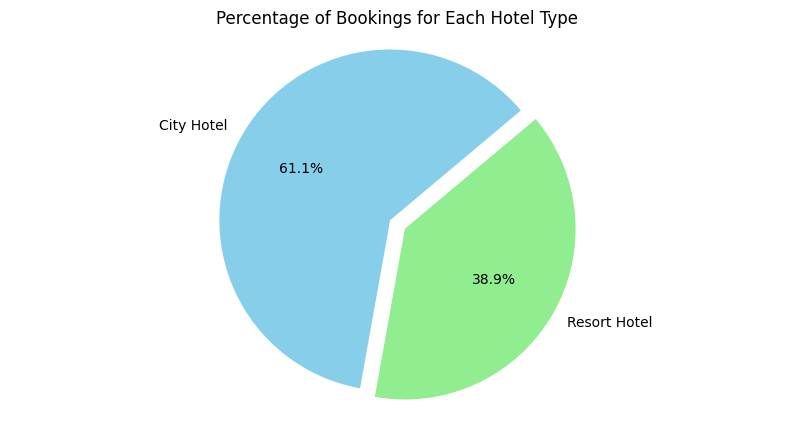

In [ ]:
# Which hotel has more number of bookings
# Getting types of hotel from the dataset
print("Types of Hotel", df['hotel'].unique())

# Using seaborn to plot the graph for Booking % per hotel
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame(grouped_by_hotel.size()/df['hotel'].shape[0]*100).reset_index().rename(columns = {0 : 'Bookings %'})

# Plotting percentage of bookings for each hotel type using matplotlib
plt.figure(figsize=(10,5))
plt.pie(d1['Bookings %'], labels=d1['hotel'], autopct='%1.1f%%', startangle=40, colors=['skyblue', 'lightgreen'], explode=[0.05, 0.05])
plt.axis('equal')
plt.title('Percentage of Bookings for Each Hotel Type')
plt.show()

##### As seen from the above diagram, it is clear that City hotel has more booking percentage when compared to Resort Hotel

#### 2.2 Cancellation hotel wise

Total number of cancellation is 24009
Total number of resort cancellation is 7974
Total number of city cancellation is 16035
Percentage of Total Cancellation is 27.523787687722113
Percentage of Resort Cancellation is 23.483331370008244
Percentage of City Cancellation is 14.9679017907422


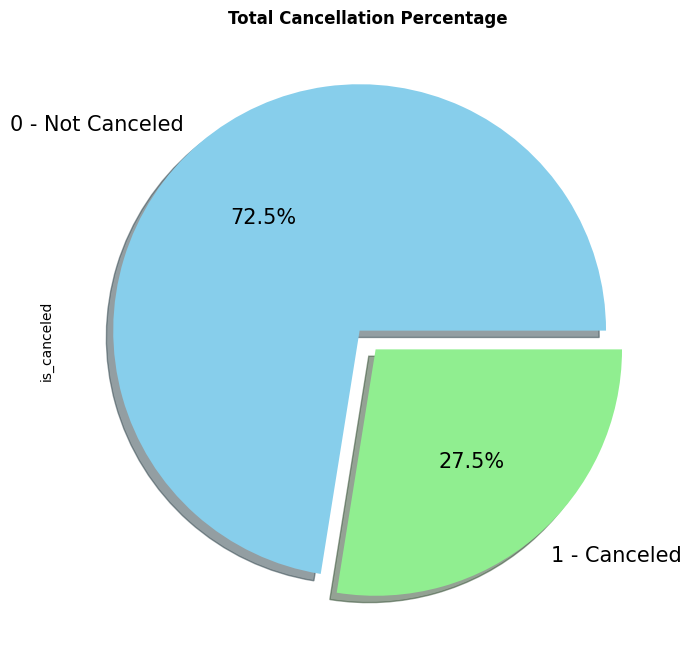

In [ ]:
# Calculating total cancellations hotel wise
Total_Cancellations = df['is_canceled'].sum()
Resort_Cancellations = df.loc[df['hotel'] == 'Resort Hotel']['is_canceled'].sum()
City_Cancellations = df.loc[df['hotel'] == 'City Hotel']['is_canceled'].sum()

print(f'Total number of cancellation is {Total_Cancellations}')
print(f'Total number of resort cancellation is {Resort_Cancellations}')
print(f'Total number of city cancellation is {City_Cancellations}')

# Calculating percentage of total cancellations hotel wise

Per_Total_Cancellations = Total_Cancellations/df.shape[0]*100
Per_Resort_Cancellations = Resort_Cancellations/df.loc[df['hotel'] == 'Resort Hotel'].shape[0]*100
Per_City_Cancellations = Resort_Cancellations/df.loc[df['hotel'] == 'City Hotel'].shape[0]*100

print(f'Percentage of Total Cancellation is {Per_Total_Cancellations}')
print(f'Percentage of Resort Cancellation is {Per_Resort_Cancellations}')
print(f'Percentage of City Cancellation is {Per_City_Cancellations}')

# Plotting a chart to visualize total cancellation percentage using pandas
plt.figure(figsize = (12,5))

Labels = ['0 - Not Canceled', '1 - Canceled']

df['is_canceled'].value_counts().plot.pie(labels = Labels, explode = [0.05, 0.05], autopct = '%1.1f%%', startangle = 0, shadow=True, figsize=(16,8), fontsize = 15, colors=['skyblue', 'lightgreen'])
plt.title('Total Cancellation Percentage', weight='bold')
plt.show()

##### Total cancellation percentage of both city and resort hotel stands at 27.5%

#### 2.3 Which month has more number of bookings

August       11242
July         10043
May           8344
April         7900
June          7756
March         7489
October       6921
September     6682
February      6083
December      5112
November      4973
January       4685
Name: arrival_date_month, dtype: int64


Text(0, 0.5, 'Reservation Count')

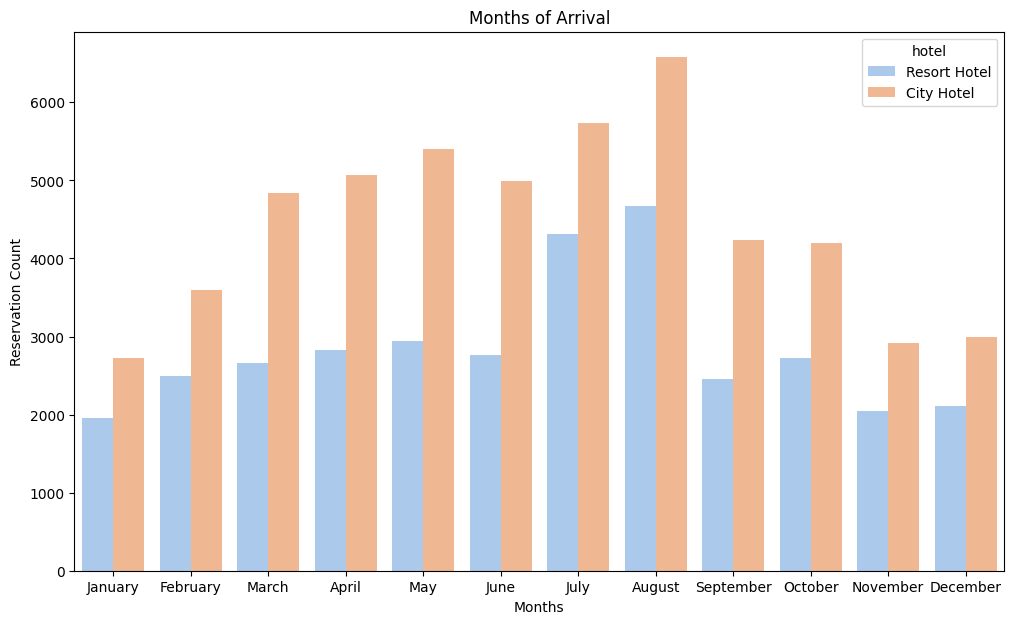

In [ ]:
# Calculating which month has more number of bookings
print(df['arrival_date_month'].value_counts().sort_values(ascending=False))

# Using seaborn to plot months with more number of bookings
plt.figure(figsize = (12,7))
Graph = sns.countplot(data=df, x='arrival_date_month', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], hue='hotel', palette='pastel')
Graph.set(title = 'Months of Arrival')
Graph.set_xlabel('Months')
Graph.set_ylabel('Reservation Count')

1.   August month has more number of bookings in both city and resort hotels
2.   July has the secong highest bookings
3.   January has the least bookings in the whole year





#### 2.4 Which year has more number of bookings?

2016    42313
2017    31633
2015    13284
Name: arrival_date_year, dtype: int64


Text(0, 0.5, 'Reservation Count')

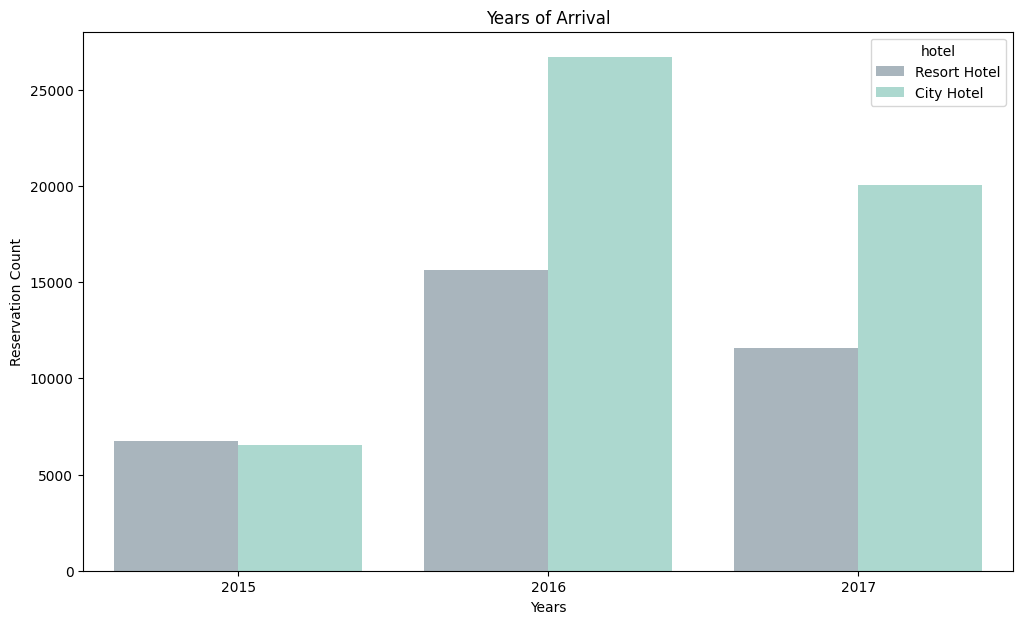

In [ ]:
# Calculating which year has more number of bookings
print(df['arrival_date_year'].value_counts().sort_values(ascending=False))

# Using seaborn to plot months with more number of bookings
plt.figure(figsize = (12,7))
pastel_colors = ['#A6B5C0', '#A5DFD3']
Graph = sns.countplot(data=df, x='arrival_date_year', hue='hotel', palette=pastel_colors)
Graph.set(title = 'Years of Arrival')
Graph.set_xlabel('Years')
Graph.set_ylabel('Reservation Count')

2016 has the most number of guests arrival

#### 2.5 Which meal is most sought out by customers?

BB           67907
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64


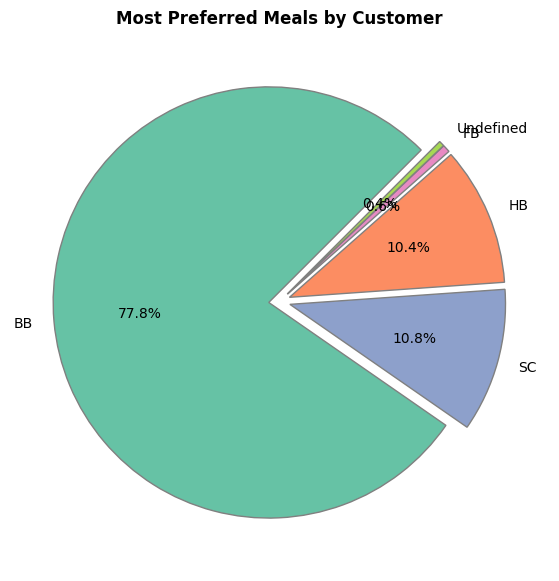

In [ ]:
# Calculating counts of meals
meals = df['meal'].value_counts()
print(meals)
meals_labels = ['BB', 'SC', 'HB', 'FB', 'Undefined']

custom_colors = ['#66c2a5', '#8da0cb', '#fc8d62', '#e78ac3', '#a6d854']

# Using matplotlib to plot most meal preferred meals by customer
plt.figure(figsize=(12, 7))
plt.pie(meals, labels=meals_labels, explode=[0.05, 0.05, 0.05, 0.05, 0.05],
        startangle=45, autopct='%1.1f%%', wedgeprops={'linewidth': 1, 'edgecolor': 'Gray'},
        colors=custom_colors)
plt.title('Most Preferred Meals by Customer', weight='bold')
plt.show()

1.   BB meal type has the highest preference at 77.8%
2.   HB and SC meal type have almost same preference at 10.4% and 10.8% respectively
3.   FB has the least preference at 0.4%.




#### 2.6 From which country most guests arrive

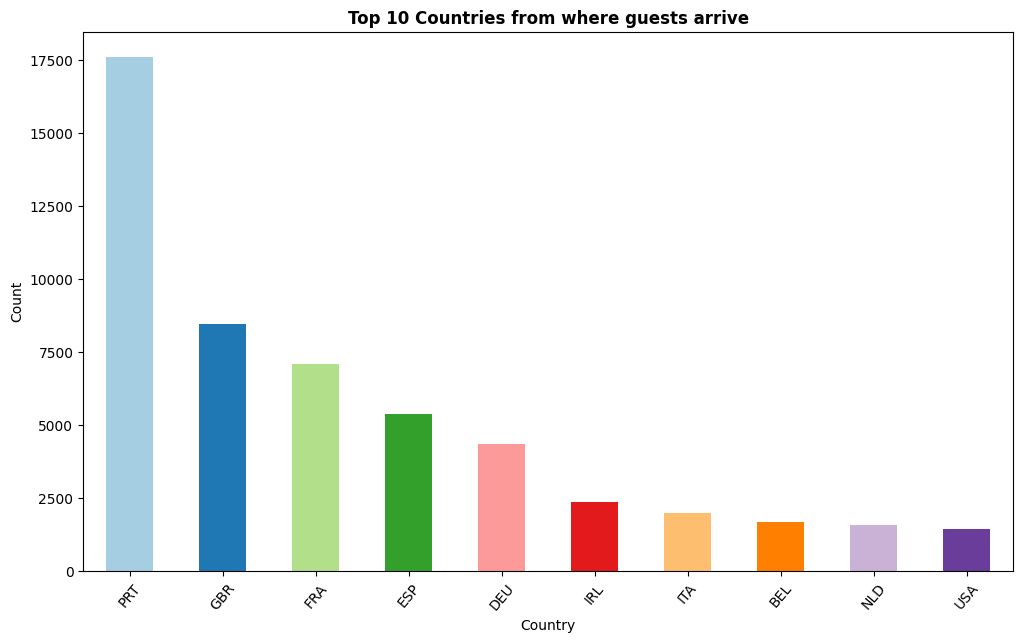

In [ ]:
# Calculating and plotting for visualizing from which country most guests arrive
plt.figure(figsize=(12,7))
Top10_countries = df[df['is_canceled'] == 0]['country'].value_counts().head(10)
Top10_countries.plot(kind='bar', color=sns.color_palette("Paired"))
plt.xticks(rotation=50)
plt.title('Top 10 Countries from where guests arrive', weight='bold')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

1.   More number of guests arrive from Portugal when compared to other countries
2.   Guests from Netherland and USA are almost same



#### 2.7 How long does people stay?

In [ ]:
# Adding a new Column Total Nights to the dataset
df['Total Nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total Nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [ ]:
# Grouping by total nights with hotel and sorting it by number of days to get top 30 days
Top_Days = df.groupby(['Total Nights', 'hotel']).size().reset_index(name='Number of Days').sort_values('Number of Days', ascending=False).head(30)
Top_Days

,Total Nights,hotel,Number of Days
6,3,City Hotel,13542
4,2,City Hotel,10813
2,1,City Hotel,10270
8,4,City Hotel,9610
3,1,Resort Hotel,6899
15,7,Resort Hotel,5675
5,2,Resort Hotel,4921
7,3,Resort Hotel,4285
10,5,City Hotel,4168
9,4,Resort Hotel,3955


<Axes: xlabel='Total Nights', ylabel='Number of Days'>

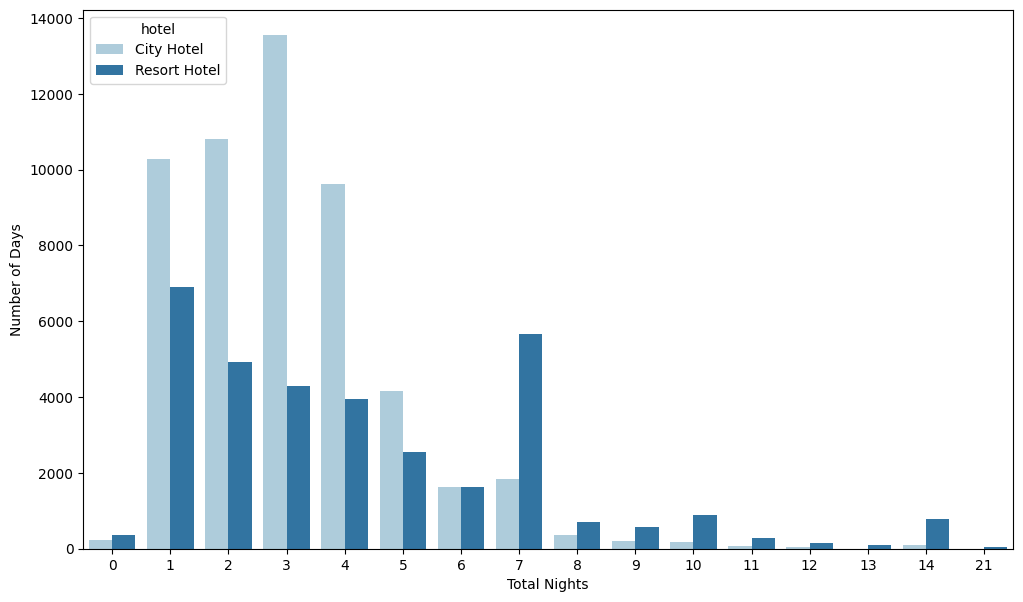

In [ ]:
# Using seaborn to visualize most number of stays by customer in hotels
plt.figure(figsize=(12,7))
colors = sns.color_palette("Paired")
sns.barplot(x='Total Nights', y = 'Number of Days', hue='hotel', data = Top_Days, palette = colors)

1.   Most guest's stay in hotel for 3 or 2 nights.
2.   Guests stay in a hotel for a maximum nights of 7 as shown by the graph



#### 2.8 Are bookings more frequent on weekdays or weekends?

Total Weekday Nights 228885
Total Weekend Nights 87632


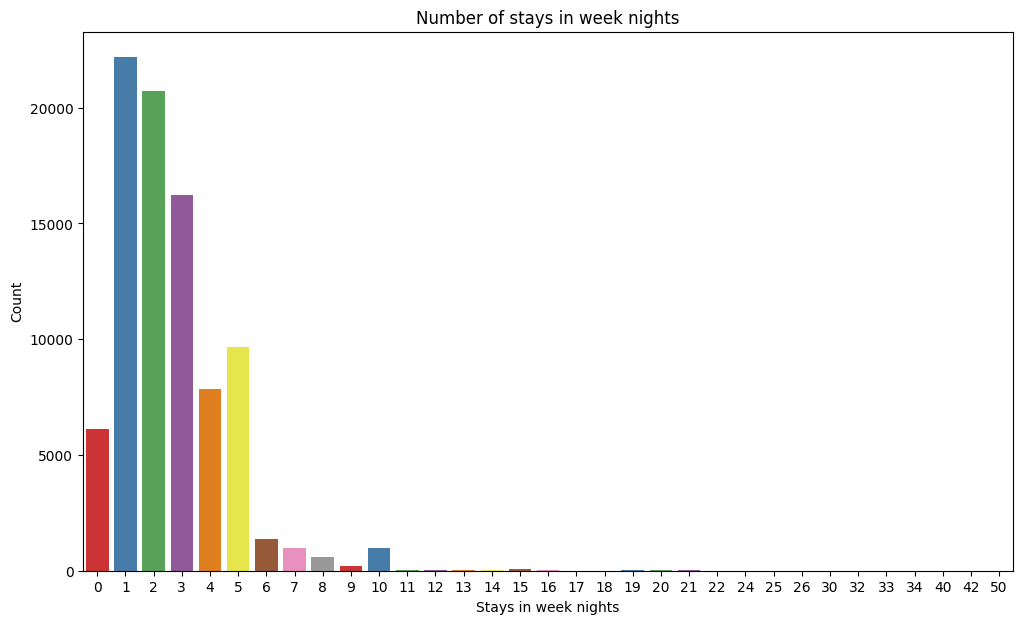

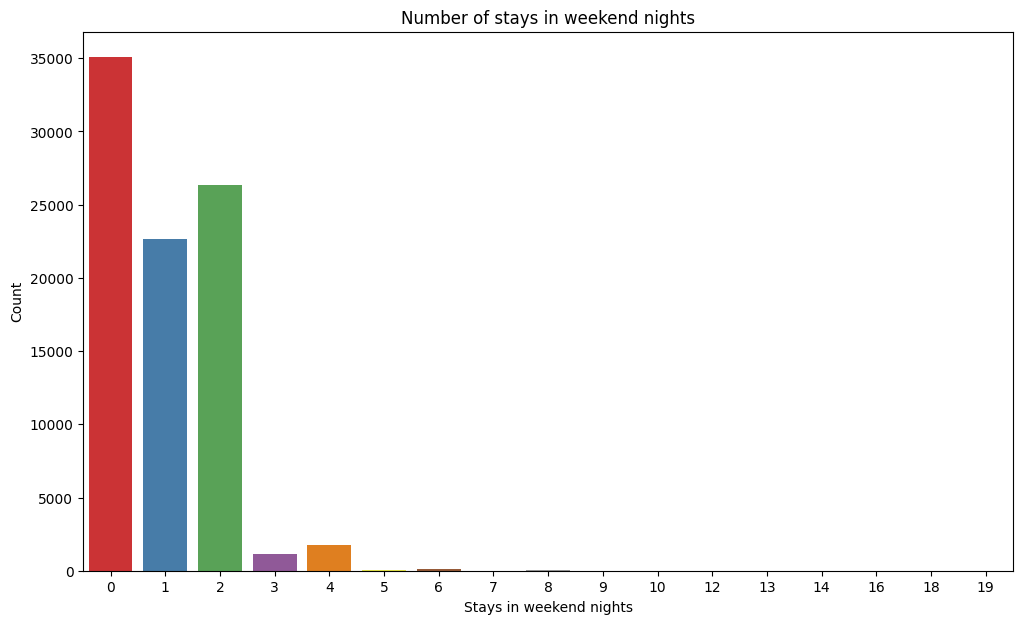

In [ ]:
# Calculating total weekday and weekend nights
Weekday_Nights = df['stays_in_week_nights'].sum()
Weekend_Nights = df['stays_in_weekend_nights'].sum()
print("Total Weekday Nights", Weekday_Nights)
print("Total Weekend Nights", Weekend_Nights)

# Plotting using seaborn to visualize count of stays in week nights
plt.figure(figsize = (12,7))
sns.countplot(data = df, x= 'stays_in_week_nights', palette = 'Set1')
plt.title('Number of stays in week nights')
plt.xlabel('Stays in week nights')
plt.ylabel('Count')
plt.show()

# Plotting using seaborn to visualize count of stays in weekend nights
plt.figure(figsize = (12,7))
sns.countplot(data = df, x= 'stays_in_weekend_nights', palette = 'Set1')
plt.title('Number of stays in weekend nights')
plt.xlabel('Stays in weekend nights')
plt.ylabel('Count')
plt.show()

1.   Stays in weekday nights are more compared to stays in weekend nights
2.   Most guests stay in weekday for 2 or 3 nights

3.   Most guests don't stay for a night in weekend
4.   Least nights stayed by guests in weekend are 5 days

#### 2.9 What is the customer composition distribution between the two hotels?

In [ ]:
# Calculating distribution of customer types between two hotels
Cust_type_hotel = df.groupby(['customer_type', 'hotel']).size().reset_index(name='Count')
Cust_type_hotel

,customer_type,hotel,Count
0,Contract,City Hotel,1467
1,Contract,Resort Hotel,1668
2,Group,City Hotel,269
3,Group,Resort Hotel,272
4,Transient,City Hotel,44522
5,Transient,Resort Hotel,27340
6,Transient-Party,City Hotel,7016
7,Transient-Party,Resort Hotel,4676


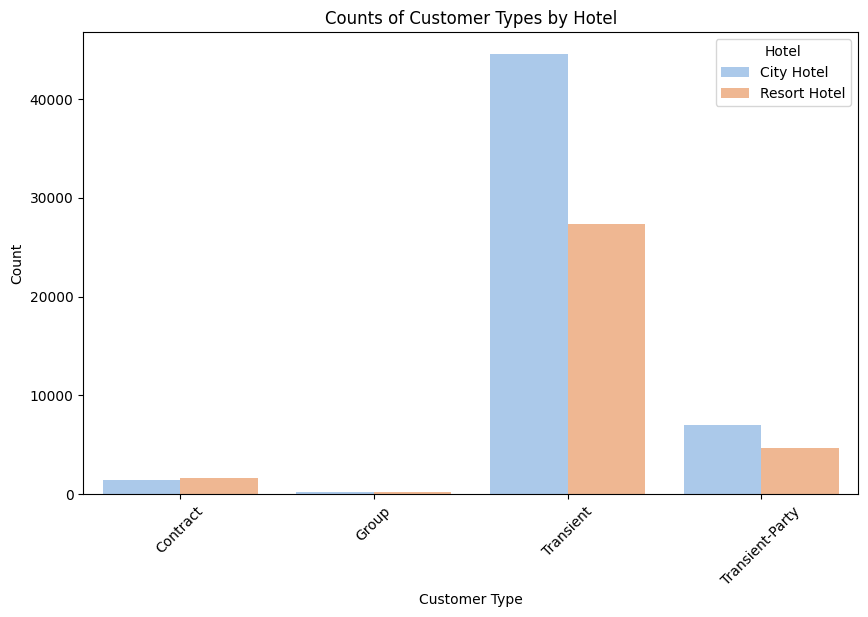

In [ ]:
# Plotting using seaborn to visualize distribution of customer type by hotel
plt.figure(figsize=(10, 6))
sns.barplot(data=Cust_type_hotel, x='customer_type', y='Count', hue='hotel', palette='pastel')
plt.title('Counts of Customer Types by Hotel')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Hotel')
plt.show()

##### Transient customer type has more number of bookings in both hotels. Group customers have made the least number of bookings

#### 2.10 Booking Distribution based on assigned room

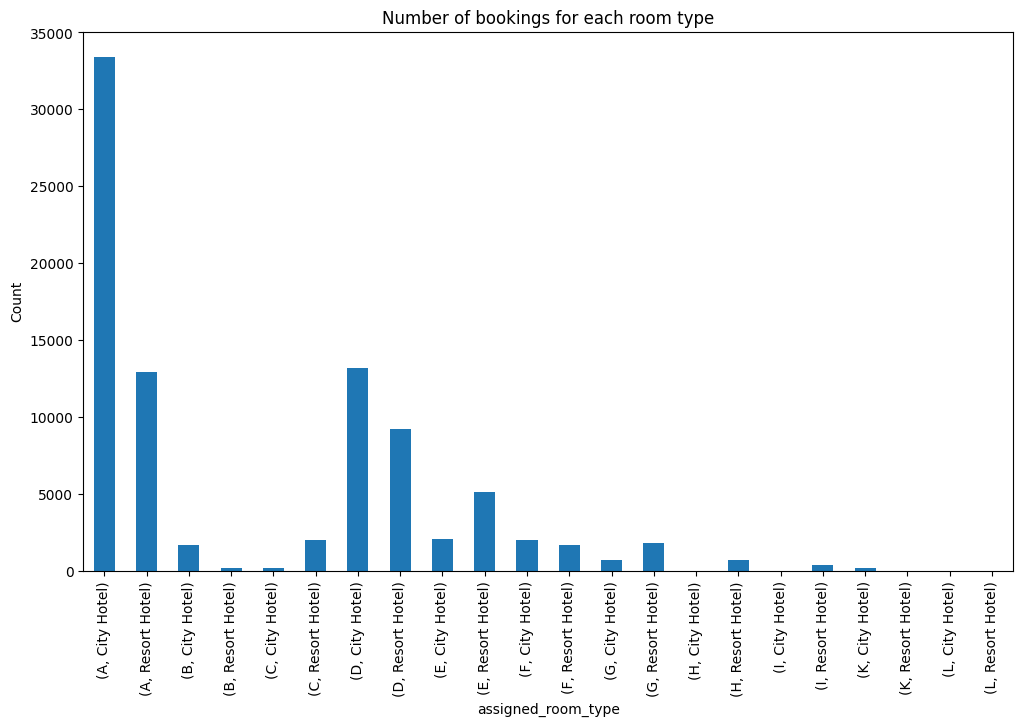

In [ ]:
# Calculating number of bookings for each room type in each hotel
Room_type = df.groupby(['hotel', 'assigned_room_type']).size().reset_index(name='Count')
Room_type_pivot = Room_type.pivot_table(index='hotel', columns='assigned_room_type',values='Count', fill_value=0)
Room_type_pivot

# Using .unstack() to pivot and unstack data
unstack = Room_type_pivot.unstack()

# Plotting unstaked data using matplotlib
unstack.plot(kind='bar', figsize=(12,7))
plt.title('Number of bookings for each room type')
plt.xlabel('assigned_room_type')
plt.ylabel('Count')
plt.show()

1.   Room Type 'A' and 'D' has more number of bookings in City Hotel.
2.   Room Type 'A' and 'D' has more number of bookings in Resort Hotel.



#### 2.11 Room Assignment Differences and Influence of Children/Babies

In [ ]:
# Creating a function to return 1 if reserved and assigned room are different else return 0
def AsgnRoomDiffFromRsvdRoom(item):
  if(item['reserved_room_type'] != item['assigned_room_type']):
    return 1
  else:
    return 0

# Creating a function to return 1 if there are children or babies else 0
def ChildorBabies(item):
  if(item['children'] > 0 or item['babies'] > 0):
    return 1
  else:
    return 0

df['got_diff_room'] = df[['reserved_room_type', 'assigned_room_type']].apply(AsgnRoomDiffFromRsvdRoom, axis=1)
df['any_child_or_babies'] = df[['children', 'babies']].apply(ChildorBabies, axis=1)

Df = df.groupby(['got_diff_room'])['got_diff_room'].count()
Df

got_diff_room
0    74240
1    12990
Name: got_diff_room, dtype: int64

,got_diff_room,any_child_or_babies
got_diff_room,1.000000,-0.010806
any_child_or_babies,-0.010806,1.000000


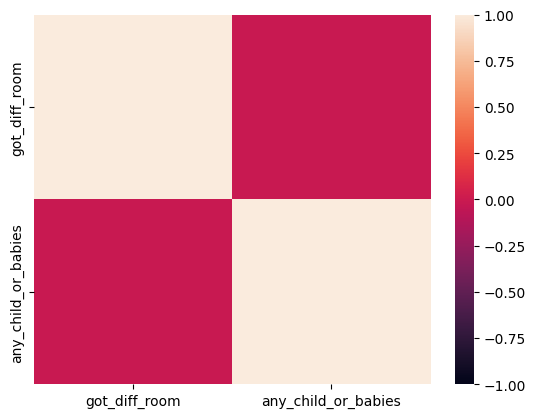

In [ ]:
# Correlation between getting different room with having child or babies
Df = df[['got_diff_room', 'any_child_or_babies']]
sns.heatmap(Df.corr(), vmin=-1,vmax=1)
Df.corr()

In [ ]:
# Calculating percentage of booking having child or babies getting different room
Df_gotdiffroom = df[df['got_diff_room'] ==1]
Df = Df_gotdiffroom.groupby(['hotel']).agg({'any_child_or_babies' : ['count','sum']})
Df

any_child_or_babies     
                           count  sum
hotel                                
City Hotel                  5980  844
Resort Hotel                7010  409

In [ ]:
Df.apply(lambda x: x.any_child_or_babies['sum'] / x.any_child_or_babies['count'], axis = 1)

hotel
City Hotel      0.141137
Resort Hotel    0.058345
dtype: float64

In [ ]:
# Calculating of percentage of booking having child or babies getting same room
Df_gotsameroom = df[df['got_diff_room'] ==0]
Df = Df_gotsameroom.groupby(['hotel']).agg({'any_child_or_babies' : ['count','sum']})
Df

any_child_or_babies      
                           count   sum
hotel                                 
City Hotel                 47294  4390
Resort Hotel               26946  3460

In [ ]:
Df.apply(lambda x: x.any_child_or_babies['sum'] / x.any_child_or_babies['count'], axis = 1)

hotel
City Hotel      0.092824
Resort Hotel    0.128405
dtype: float64

The correlation between room assignments and the presence of children or babies in city and resort hotels suggests a lower likelihood of families with children or babies getting different rooms in resort hotels compared to city hotels.

#### 2.12 Who does more cancellation repeated or non-repeated guests?

,is_repeated_guest,is_canceled
is_repeated_guest,1.000000,-0.088764
is_canceled,-0.088764,1.000000


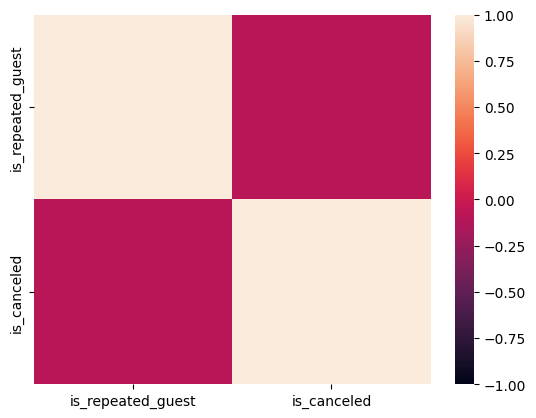

In [ ]:
# Correlation between repeated guest and their cancellation
Df = df[['is_repeated_guest', 'is_canceled']]
sns.heatmap(Df.corr(), vmin=-1,vmax=1)
Df.corr()

In [ ]:
# Calculating percentage of cancellation by repeated guests
Df_repeateduser = df[df['is_repeated_guest'] == 1]
Df = Df_repeateduser.groupby(['hotel']).agg({'is_canceled' : ['count', 'sum']})
Df

is_canceled     
                   count  sum
hotel                        
City Hotel          1657  188
Resort Hotel        1707   72

In [ ]:
Df.apply(lambda x: x.is_canceled['sum']/x.is_canceled['count'],axis=1)

hotel
City Hotel      0.113458
Resort Hotel    0.042179
dtype: float64

In [ ]:
# Calculating percentage of cancellation by non repeated guests(i.e 1st time visiting guest)
Df_nonrepeateduser = df[df['is_repeated_guest'] == 0]
Df = Df_nonrepeateduser.groupby(['hotel']).agg({'is_canceled' : ['count','sum']})
Df

is_canceled       
                   count    sum
hotel                          
City Hotel         51617  15847
Resort Hotel       32249   7902

In [ ]:
Df.apply(lambda x: x.is_canceled['sum']/x.is_canceled['count'],axis=1)

hotel
City Hotel      0.307011
Resort Hotel    0.245031
dtype: float64

The percentage of cancellations is notably higher among non-repeated users in both City and Resort Hotels compared to repeated users.

#### 2.13 Do Customers who have booked early have any correlation with cancellation?

,lead_time,is_canceled
lead_time,1.000000,0.184515
is_canceled,0.184515,1.000000


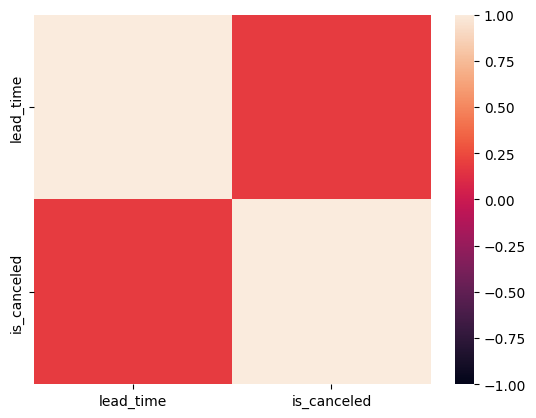

In [ ]:
# Correlation between lead time and cancellation
Df = df[['lead_time', 'is_canceled']]
sns.heatmap(Df.corr(), vmin=-1,vmax=1)
Df.corr()

In [ ]:
# Calculating the mean time of lead time that is leading to cancellation
Df_Canceled = df[df['is_canceled'] == 1]
Df = Df_Canceled.groupby(['hotel']).agg({'lead_time' : ['mean']})
Df

,lead_time
,mean
hotel,
City Hotel,101.657499
Resort Hotel,113.944444


In [ ]:
# Calculating the mean time of lead time that is leading to non cancellation
Df_NotCanceled = df[df['is_canceled'] == 0]
Df = Df_NotCanceled.groupby(['hotel']).agg({'lead_time' : ['mean']})
Df

,lead_time
,mean
hotel,
City Hotel,67.517388
Resort Hotel,74.009738


There is a clear positive correlation between lead_time and cancellation status, indicating that longer lead times are associated with a higher likelihood of cancellations. On average, canceled bookings have a lead time that is 40 days longer than bookings that were not canceled.

#### 2.14 Does having child or babies have any correlation with special requests?



,total_of_special_requests,any_child_or_babies
total_of_special_requests,1.000000,0.094623
any_child_or_babies,0.094623,1.000000


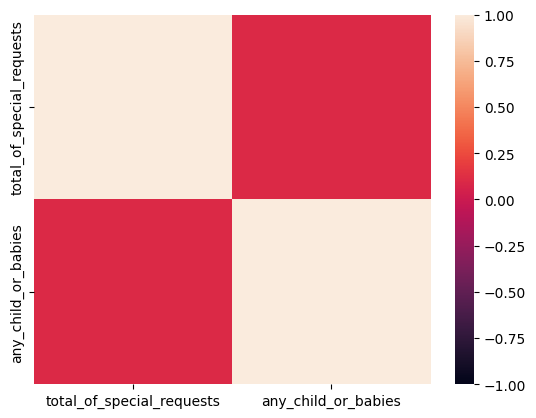

In [ ]:
# Correlation between total number of special requests with having child or babies
Df = df[['total_of_special_requests','any_child_or_babies']]
sns.heatmap(Df.corr(), vmin=-1,vmax=1)
Df.corr()

,total_of_special_requests,any_child_or_babies
total_of_special_requests,1.000000,0.110681
any_child_or_babies,0.110681,1.000000


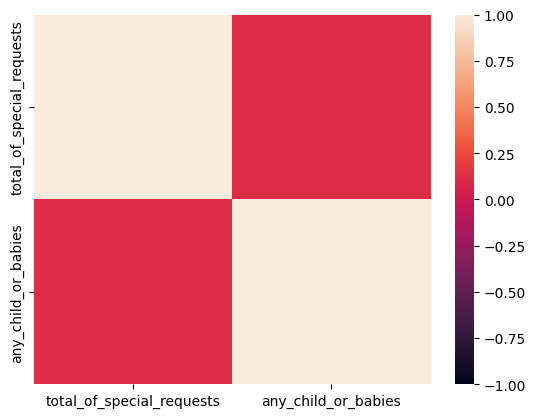

In [ ]:
# Finding correlation between special requests with having child or babies in city hotels
Df = df[df['hotel'] == 'City Hotel'][['total_of_special_requests', 'any_child_or_babies']]
sns.heatmap(Df.corr(),vmin=-1,vmax=1)
Df.corr()

,total_of_special_requests,any_child_or_babies
total_of_special_requests,1.000000,0.072321
any_child_or_babies,0.072321,1.000000


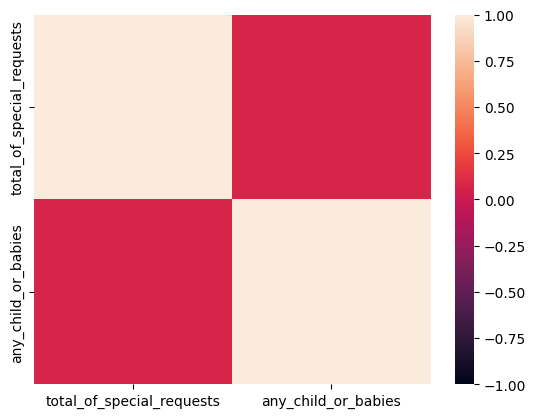

In [ ]:
# Finding correlation between special requests with having child or babies in resort hotels
Df = df[df['hotel'] == 'Resort Hotel'][['total_of_special_requests', 'any_child_or_babies']]
sns.heatmap(Df.corr(),vmin=-1,vmax=1)
Df.corr()

From the above comparisons, it's evident that in Resort Hotels, there are fewer special requests when guests have children or babies compared to City Hotels.

#### 2.15 Which year has more number of bookings for each hotel type?

In [ ]:
# Calculating number of bookings for two hotels per year
Df = df.groupby(['hotel', 'arrival_date_year']).size()
Df

hotel         arrival_date_year
City Hotel    2015                  6526
              2016                 26684
              2017                 20064
Resort Hotel  2015                  6758
              2016                 15629
              2017                 11569
dtype: int64

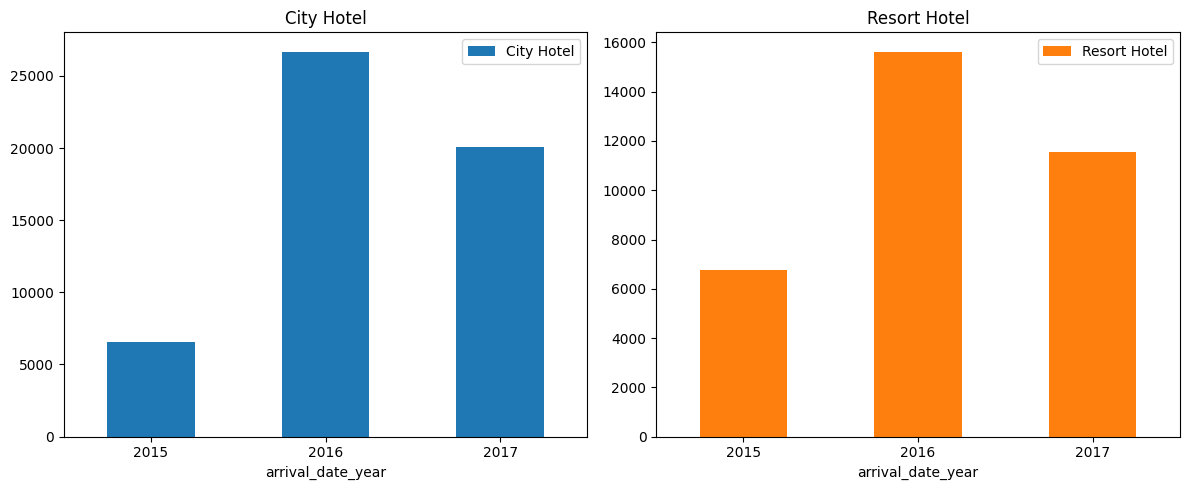

In [ ]:
# Plotting year wise bookings for each hotel type
Year_wise_booking = Df.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(12,5), layout=(1,2))
plt.tight_layout()

1.   2016 has more number of bookings when compared to other years
2.   City Hotel has more number of bookings than Resort hotel in the year 2016



#### 2.16 Which agent has made more number of bookings?

Text(0.5, 1.0, 'Most Bookings made by Agents')

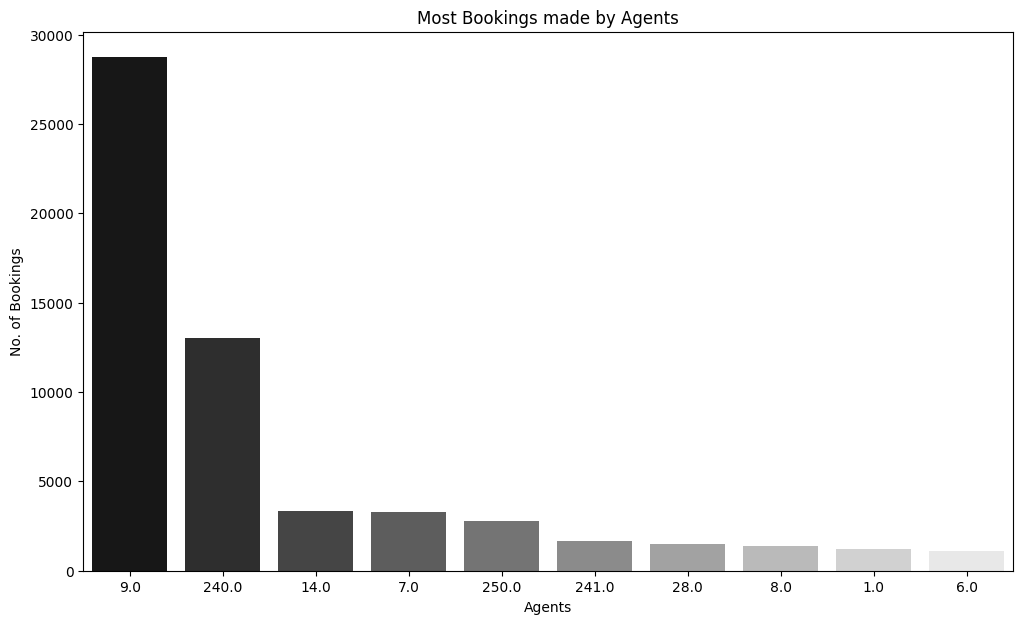

In [ ]:
Agent_Bookings = df.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns = {'count' : 'Bookings'}).sort_values(by='Bookings',ascending=False)
Agent_Bookings.drop(Agent_Bookings[Agent_Bookings['agent'] ==0].index,inplace=True)
Top_10_Agents = Agent_Bookings[:10]
Top_10_Agents

plt.figure(figsize=(12,7))
sns.barplot(x=Top_10_Agents['agent'], y=Top_10_Agents['Bookings'], order=Top_10_Agents['agent'], palette = 'gray')
plt.xlabel('Agents')
plt.ylabel('No. of Bookings')
plt.title('Most Bookings made by Agents')

1.   Agent No.9 has more number of bookings
2.   Agent No.240 has the second highest booking
3.   Agent No.6 has the least bookings





#### 2.17 Correlation of meal type with cancellation

In [ ]:
# Checking meal type affecting cancellation
meal_cancellation = df[['meal','is_canceled']]
meal_cancellation = meal_cancellation[meal_cancellation['is_canceled'] != 0]
meal_cancellation['meal'].value_counts()

BB           18043
SC            3336
HB            2449
FB              99
Undefined       82
Name: meal, dtype: int64

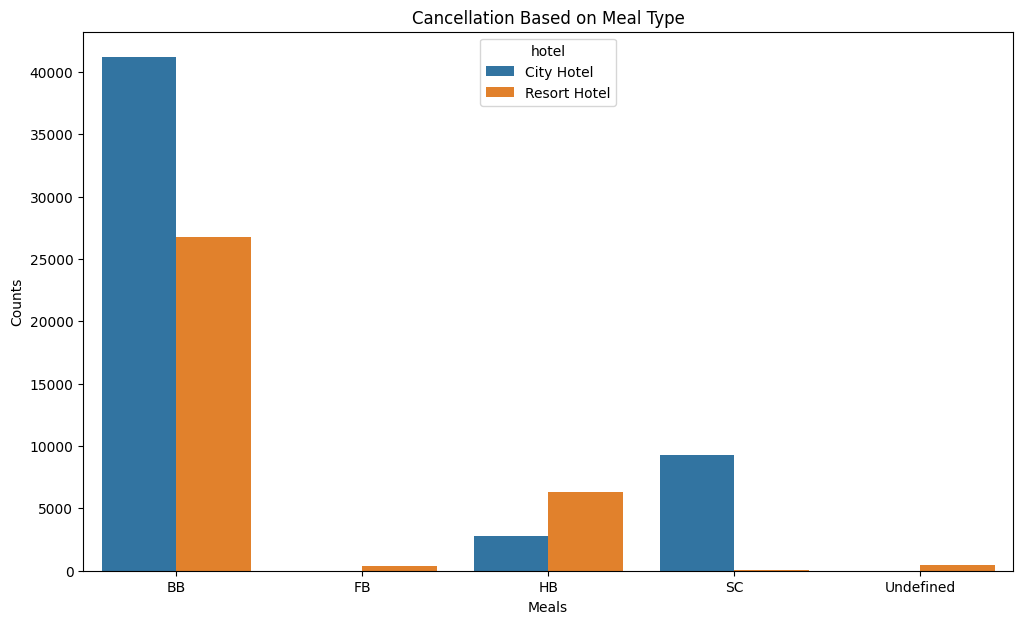

In [ ]:
meal_type_cancellation = df[df['is_canceled'] ==1]
meal_type_cancellation = df.groupby(['meal', 'hotel']).size().reset_index().rename(columns={0 : 'Cancelled'})
meal_type_cancellation

# Plotting the map for cancellation based on meal type
plt.figure(figsize=(12,7))
sns.barplot(data=meal_type_cancellation, x= 'meal', y='Cancelled', hue = 'hotel')
plt.xlabel('Meals')
plt.ylabel('Counts')
plt.title('Cancellation Based on Meal Type')
plt.show()

1.   BB meal type from City hotel has more number of cancellation when compared to resort hotel
2.   SC meal type has more number of cancellation in city hotel
3.   Resort hotel has more number of cancellatio in HB meal type





#### 2.18 Which meal type is most preferred by customers?

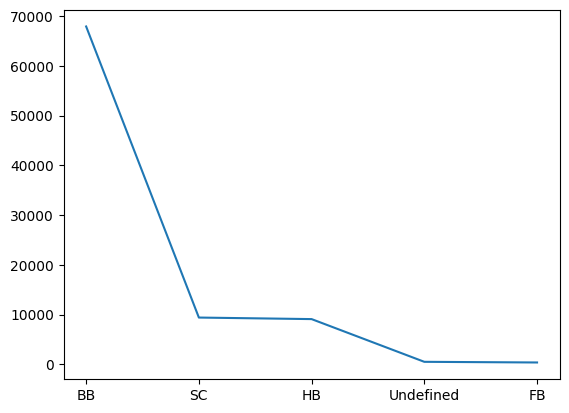

In [ ]:
plt.plot(df['meal'].value_counts())
plt.show()

##### BB meal type is most preferred by the customers. FB is the least preferred meal type by the customers

#### 2.19 Which market segment has more bookings?

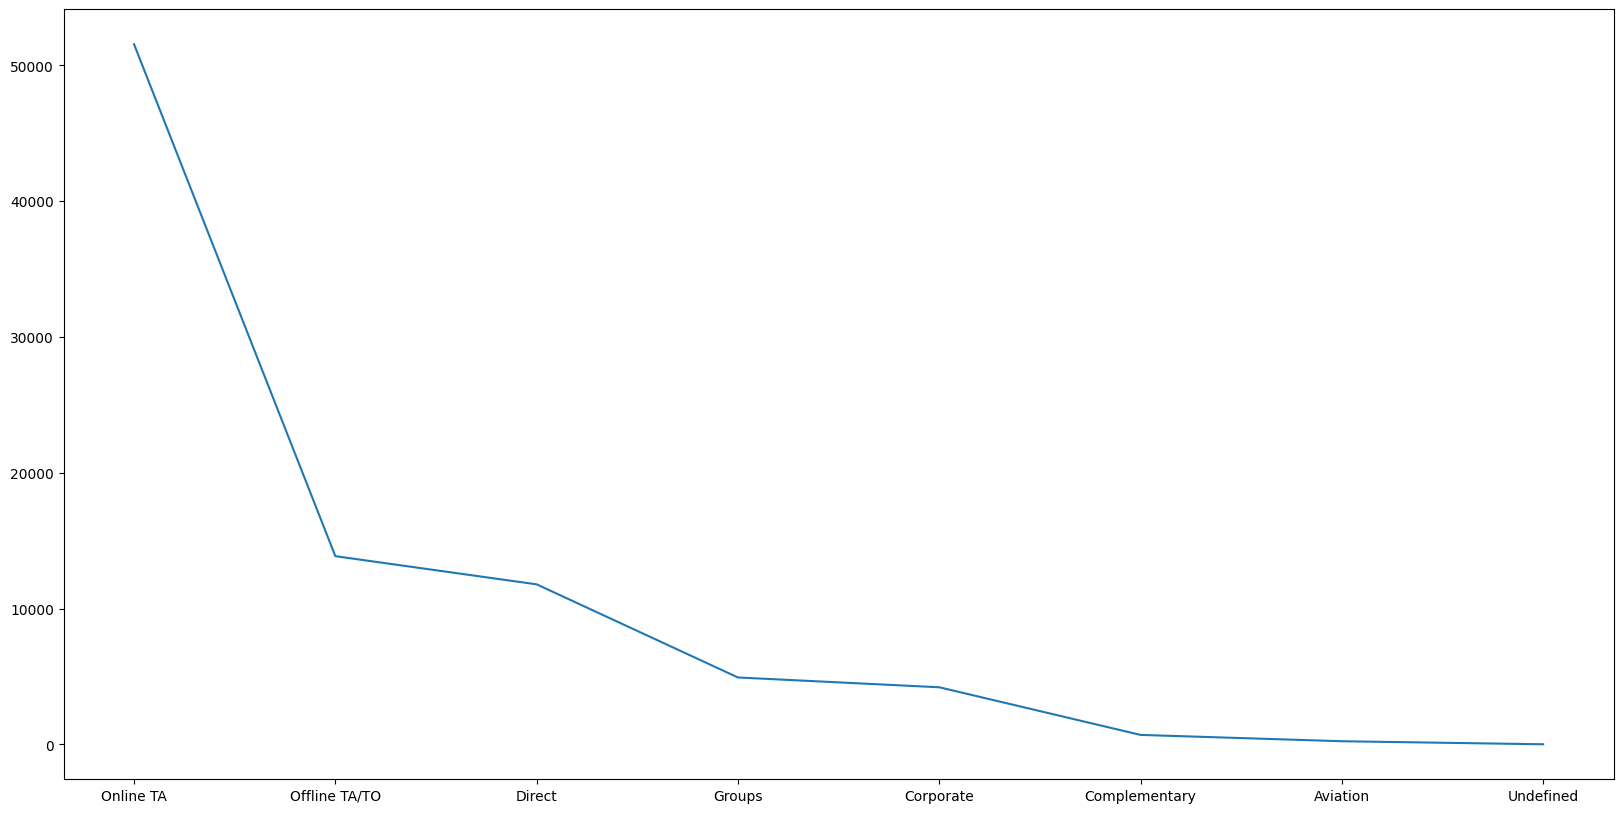

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df['market_segment'].value_counts())
plt.show()

##### Online TA has more number of bookings compared to other market segments

#### 2.20 Which market segment has most cancellations?

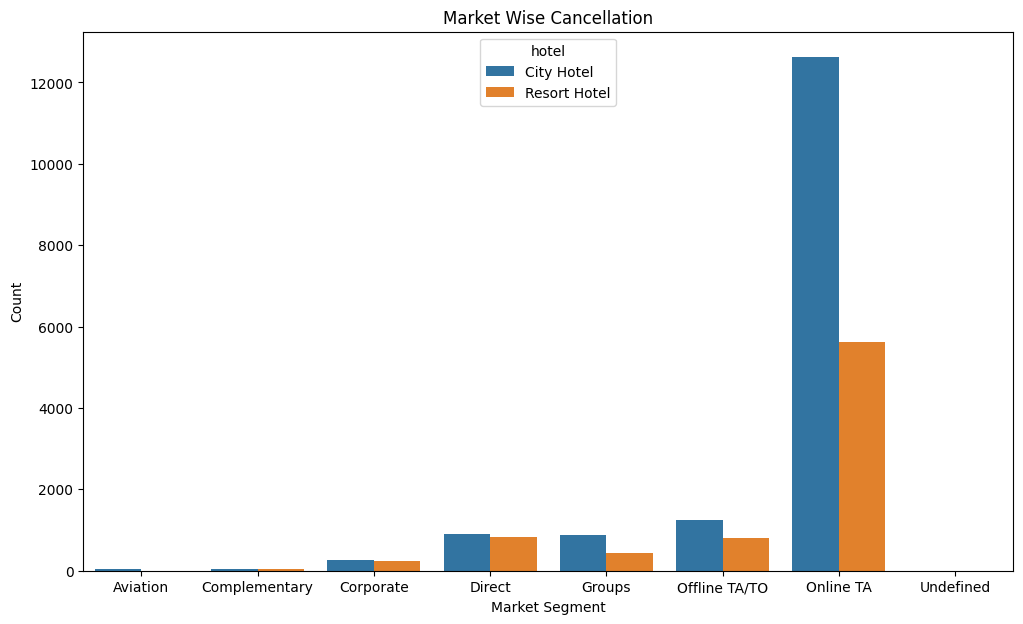

In [ ]:
market_segment_cancellation = df[df['is_canceled']==1]
market_segment_cancellation= market_segment_cancellation.groupby(['market_segment','hotel']).size().reset_index().rename(columns={0 : 'Counts'})
market_segment_cancellation

plt.figure(figsize=(12,7))
sns.barplot(x = 'market_segment', y = 'Counts', hue='hotel', data=market_segment_cancellation)
plt.title('Market Wise Cancellation')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.show()

1.   Online TA market segment has more number of cancellation when compared to other market segments
2.   City hotel has high cancellation rate in Online TA than Resort hotel
3.   Offline TA/TO has second highest cancellation rate
4.   Hotel can offer special deals or discounts for customers who commit to their bookings and do not cancel within a certain time frame.






#### 2.21 Which hotel has more number of repeated customers?

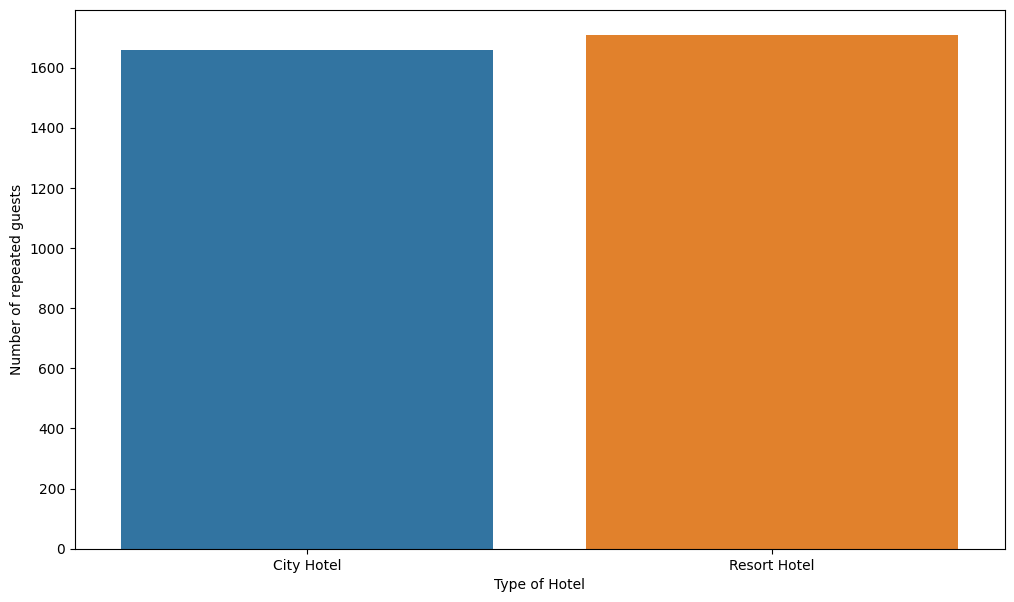

In [ ]:
# Calculating repeated guest count for each hotel
Repeated_Guest_percentage = df[df['is_repeated_guest']==1].groupby(['hotel']).size().reset_index().rename(columns={0:'Counts'})
Repeated_Guest_percentage

# Using seaborn to plot count of repeated guest for each hotel
plt.figure(figsize=(12,7))
sns.barplot(data=Repeated_Guest_percentage,x='hotel', y='Counts')
plt.xlabel('Type of Hotel')
plt.ylabel('Number of repeated guests')
plt.show()

##### Resort Hotel has more number of repeated guests when compared to City Hotel

#### 2.22 Cancellation based on car parking space

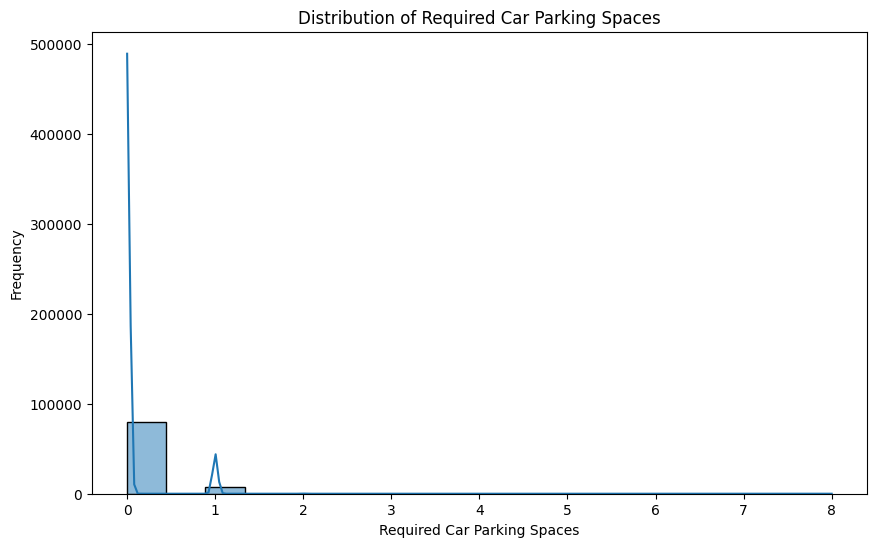

In [ ]:
# Plotting Car parking distribution using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(df.required_car_parking_spaces, kde=True)
plt.xlabel('Required Car Parking Spaces')
plt.ylabel('Frequency')
plt.title('Distribution of Required Car Parking Spaces')
plt.show()

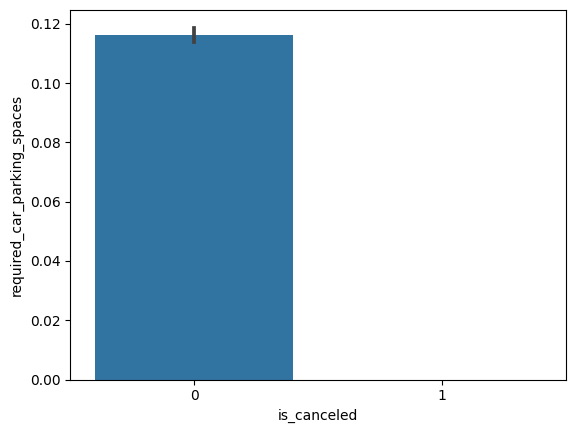

In [ ]:
sns.barplot(x='is_canceled', y='required_car_parking_spaces',data=df)
plt.show()

#### 2.23 Cancellation based on Deposit Type

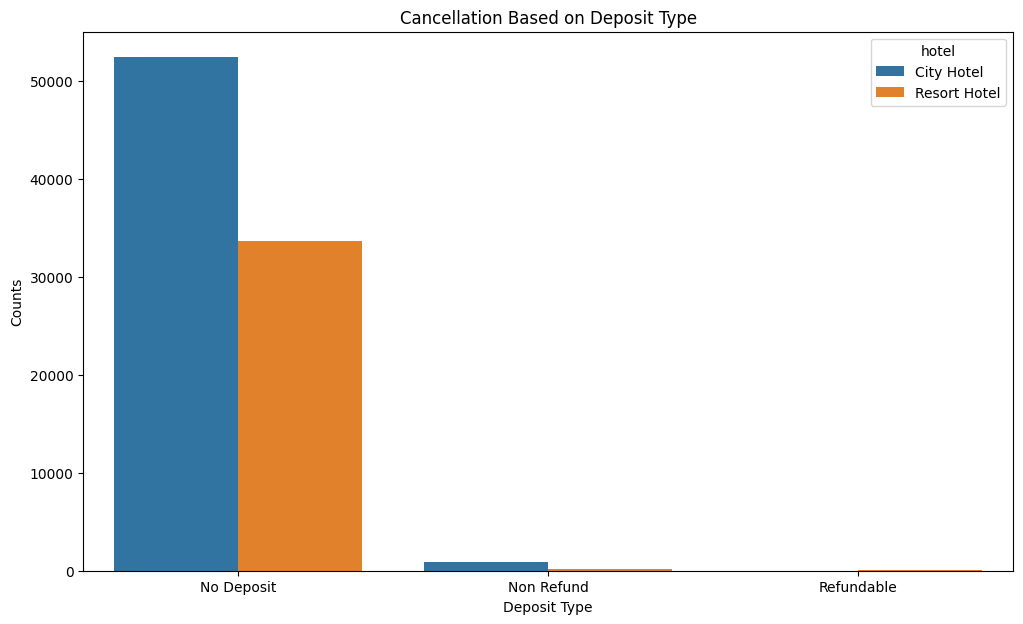

In [ ]:
# Calculating cancellation based on deposit type
Dep_Type_Cancel = df[df['is_canceled']==1]
Dep_Type_Cancel = df.groupby(['deposit_type', 'hotel']).size().reset_index().rename(columns={0 : 'Cancelled'})
Dep_Type_Cancel

# Plotting graph for cancellatin based on deposit type
plt.figure(figsize=(12,7))
sns.barplot(data = Dep_Type_Cancel, x='deposit_type', y='Cancelled', hue='hotel')
plt.xlabel('Deposit Type')
plt.ylabel('Counts')
plt.title('Cancellation Based on Deposit Type')
plt.show()

1.   City hotel has more number of cancellation than resort hotel
2.   The cancellations are more in no deposit
3.   City hotel has more cancellation than resort hotel in Non-Refund Deposit type






# ***Conclusion***



*   City hotel has more booking percentage when compared to Resort Hotel
*   Total cancellation percentage of both city and resort hotel stands at 27.5%
*   August month has more number of bookings in both city and resort hotel
*   2016 has the most number of guests arrival
*   BB(Breakfast) meal type has the highest preference at 77.8%
*   More number of guests arrive from Portugal when compared to other countries
*   Most guest's stay in hotel for 3 or 2 nights.
*   Weekdays are the most booked compared to weekends
*   The correlation indicates that families with children or babies in resort hotels are less likely to have different rooms than in city hotels.
*   The percentage of cancellations is notably higher among non-repeated users in both City and Resort Hotels compared to repeated users.
*   Having children/babies in Resort Hotels is associated with fewer special requests compared to other hotels.
*   Transient customer type has more number of bookings in both hotels. Group customers have made the least number of bookings
*   2016 has more number of bookings when compared to other years
*   Agent No.9 has more number of bookings and Agent No.6 has the least bookings
*   BB meal type from City hotel has more number of cancellation when compared to resort hotel
*   Online TA market segment has more number of cancellation when compared to other market segments
*   The cancellations are more in no deposit type of deposit
